# **Multi-layer Perceptron**


Multi Layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output.

![MLP](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png)

MLP has three layers of nodes: an input layer, a hidden layer and an output layer.

Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output.



In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])




Epoch 1/100


7/7 [==============================] - 1s 4ms/step - loss: 11.2378 - mae: 3.0499
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 9.0828 - mae: 2.6786
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 7.3086 - mae: 2.3324
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 5.8520 - mae: 1.9978
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 4.4551 - mae: 1.6892
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 3.3459 - mae: 1.4219
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 2.4765 - mae: 1.2091
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9220 - mae: 1.0738
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6163 - mae: 0.9895
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1.4467 - mae: 0.9308
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 1

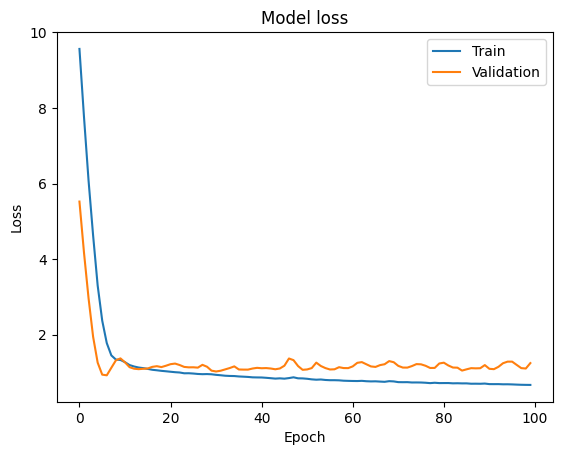

In [2]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


---

# Early Stopping of Epochs

Early stopping of Epochs in which we call the training process to stop as soon as the validation loss starts to increase. This is a very useful technique to prevent overfitting of the model.
This can be done by EarlyStopping callback in Keras. We set the patience parameter to 5, which means that the training process will stop if the validation loss does not decrease for 5 consecutive epochs. And it adjusts the learning rate by a factor of 0.1 if the validation loss does not decrease for 3 consecutive epochs.

Epoch 1/100
7/7 [==============================] - 2s 52ms/step - loss: 12.6836 - val_loss: 7.7343
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 10.4748 - val_loss: 6.0466
Epoch 3/100
7/7 [==============================] - 0s 27ms/step - loss: 8.5343 - val_loss: 4.5301
Epoch 4/100
7/7 [==============================] - 0s 31ms/step - loss: 6.6536 - val_loss: 3.2653
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 5.0931 - val_loss: 2.2613
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 3.7946 - val_loss: 1.5751
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 2.8001 - val_loss: 1.2325
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 2.0548 - val_loss: 1.1607
Epoch 9/100
7/7 [==============================] - 0s 19ms/step - loss: 1.7065 - val_loss: 1.2463
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 1.4938 - val_loss: 1.3643
Epoch 11/100
7/7 

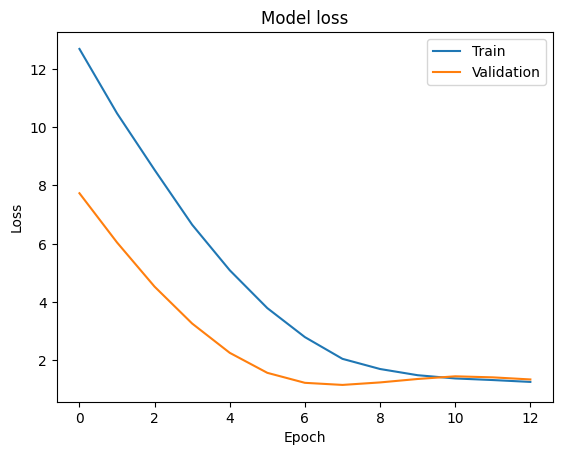

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()